In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
data=datasets.load_iris()   ##loading the iris dataset
type(data)

sklearn.utils.Bunch

In [3]:
data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [4]:
data.feature_names ##getting feature names of data 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data.target_names ##getting target names of data

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
##converting Scikit-learn dataset to pandas dataframe
df=pd.DataFrame(data= np.c_[data['data'], data['target']], columns= data['feature_names'] + ['target'])

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df["target"].unique()

array([0., 1., 2.])

In [9]:
## dividing the dataframe into features and target variable
x=df.iloc[:,0:4]    ## features
y=df.iloc[:,4]      ## target variable

In [10]:
##Performing PCA on features
pca=PCA(3)
p_components=pd.DataFrame(pca.fit_transform(x))

In [11]:
p_components.head() 

,0,1,2
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079


In [12]:
pca_df=pd.concat([p_components,y],axis=1) ##Adding the target columns to the dataset with reduced dimensions  

In [13]:
pca_df.head()

,0,1,2,target
0,-2.684126,0.319397,-0.027915,0.0
1,-2.714142,-0.177001,-0.210464,0.0
2,-2.888991,-0.144949,0.017900,0.0
3,-2.745343,-0.318299,0.031559,0.0
4,-2.728717,0.326755,0.090079,0.0


In [14]:
pca_df=pca_df.rename(columns={0:"PC_1",1:"PC_2",2:"PC_3"}) ##Renaming the features 

In [15]:
pca_df.head()

,PC_1,PC_2,PC_3,target
0,-2.684126,0.319397,-0.027915,0.0
1,-2.714142,-0.177001,-0.210464,0.0
2,-2.888991,-0.144949,0.017900,0.0
3,-2.745343,-0.318299,0.031559,0.0
4,-2.728717,0.326755,0.090079,0.0


In [16]:
df["target"].unique()

array([0., 1., 2.])

Text(0.5, 0, 'Principal Component 3')

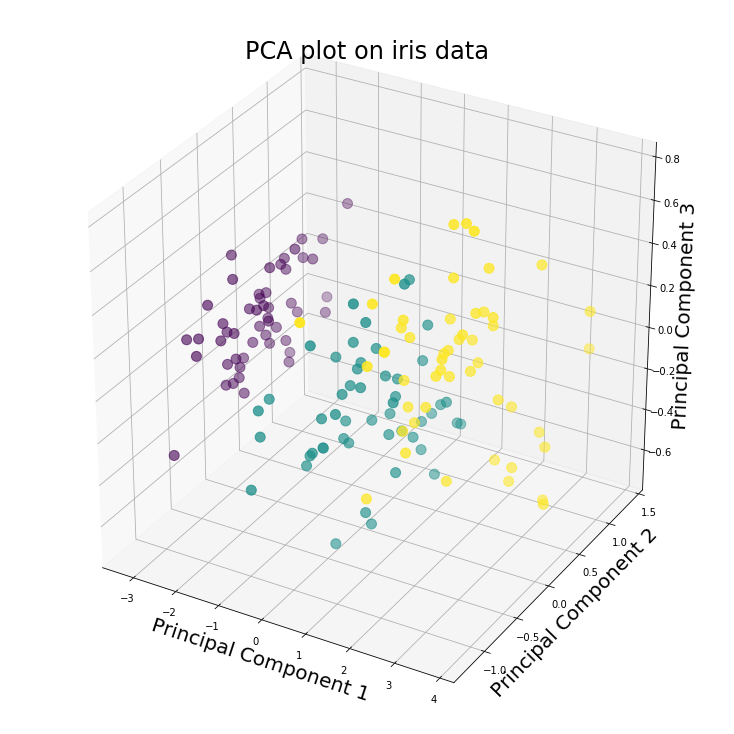

In [17]:
##Plotting the 3-D plot of iris data with reduced dimensions

fig=plt.figure(figsize=(10,10)) 
ax=Axes3D(fig)
ax.scatter(pca_df.iloc[:,0],pca_df.iloc[:,1],pca_df.iloc[:,2],c=pca_df.iloc[:,3],s=100)
ax.set_title('PCA plot on iris data',fontsize=24)
ax.set_xlabel('Principal Component 1',fontsize=20)
ax.set_ylabel('Principal Component 2',fontsize=20)
ax.set_zlabel('Principal Component 3',fontsize=20)

In [ ]:
sns.